<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Introduction to AI and Data Science

Even Semester 2023/2024

Faculty of Computer Science, Universitas Indonesia

## **Lab 2: *Statistics & Data Visualization***

### **Deadline: 17 February 2024 23:55**
</center>

#### **Guidelines:**

1. Lab document *template* in .ipynb format and dataset (if needed) have been provided on SCeLe.
2. Run the code in the .ipynb document and pay close attention to what the code snippet does and its output. Answer the **asserted questions** in the given program snippet.
3. Jupyter Notebook documents that have been completed with answers are collected in the format **Lab2_NPM_Name.ipynb**. Example: Lab2_2006123456_Budi.ipynb
4. Submit these documents onto the submission slot provided on SCeLe before **17 February 2024 23:55**. Late submission will incur a score penalty.
5. Plagiarism is not permitted in any form. As for collaboration in the form of discussion (without copying or taking other people's answers) and literature, it is still permitted by properly crediting collaborators and sources.


In [65]:
Name = "Muhammad Sakhran Thayyib"
NPM = "2206046790"

# Exploratory Data Analysis

*Exploratory Data Analysis* (EDA) is a process of analyzing datasets to see the main characteristics of the data. EDA is a basic process that influences the decisions of a data scientist in processing data at a later stage. This process often involves descriptive statistics and data visualization.

## Motorcycle Specifications Dataset

This dataset compiles essential attributes of motorcycles specifications.

* `Brand`: Brand name of the motorcycle.
* `Category`: Sub-class the motorcycle belongs to in the market (style of motorcycle).
* `Displacement (ccm)`: Engine size of the motorcycle in cubic centimeters (ccm).
* `Power (hp)`: Max power output in horsepower (hp) and kilowatt (kW) along with peak power rpm.
* `Torque (Nm)`: Max torque in newton-meters (Nm) and foot-pounds (ft-lbs) along with peak torque rpm.
* `Engine cylinder`: Number of cylinders in the engine and configuration.
* `Gearbox`: Number of gears in transmission.
* `Bore (mm)`: Diameter of each cylinder in millimeters (mm) and inches (in).
* `Stroke (mm)`: Distance within the cylinder a piston travels in millimeters (mm) and inches (in).
* `Fuel capacity (lts)`: Maximum capacity of the fuel tank in liters (lts).
* `Fuel control`: Valve configuration for the engine.
* `Cooling system`: Engine cooling system.
* `Transmission type`: Type of transmission of the motorcycle.
* `Dry weight (kg)`: Weight of the motorcycle, without any fluids, in kilograms (kg) and pounds (lbs).
* `Wheelbase (mm)`: Distance between the points where the front and rear wheels touch the ground in millimeters (mm).
* `Seat height (mm)`: Height from the bottom of the seat to the ground in millimeters (mm).

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [67]:
df = pd.read_csv('motorcycle_specifications.csv')

In [68]:
total_rows, total_attributes = df.shape
print('Number of rows:', total_rows)
print("Number of attributes:", total_attributes)

df.head()

Number of rows: 961
Number of attributes: 16


,Brand,Category,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Gearbox,Bore (mm),Stroke (mm),Fuel capacity (lts),Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm)
0,yamaha,Enduro / offroad,249.0,28.0,21.0,Single cylinder,5-speed,74.0,58.0,11.0,Single Overhead Cams (SOHC),Oil & air,Chain,130.0,1390.0,875.0
1,suzuki,Sport,1340.0,197.0,155.0,In-line four,6-speed,81.0,65.0,21.0,Double Overhead Cams/Twin Cam (DOHC),Liquid,Chain,266.0,1480.0,805.0
2,ducati,Naked bike,1262.0,152.0,126.0,V2,6-speed,106.0,71.5,17.0,Desmodromic valve control,Liquid,Belt,220.0,1615.0,755.0
3,benelli,Enduro / offroad,499.6,47.6,45.0,Twin,6-speed,69.0,66.8,15.0,Double Overhead Cams/Twin Cam (DOHC),Liquid,Chain,170.0,1450.0,815.0
4,bmw,Sport,999.0,195.0,113.0,In-line four,6-speed,80.0,49.7,17.5,Double Overhead Cams/Twin Cam (DOHC),Oil & air,Chain,175.5,1425.0,815.0


df.info() is a Pandas DataFrame method that provides a concise summary of the DataFrame, including information about the data types, non-null values, and memory usage.

In [69]:
# See columns on data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                961 non-null    object 
 1   Category             961 non-null    object 
 2   Displacement (ccm)   961 non-null    float64
 3   Power (hp)           961 non-null    float64
 4   Torque (Nm)          961 non-null    float64
 5   Engine cylinder      961 non-null    object 
 6   Gearbox              961 non-null    object 
 7   Bore (mm)            961 non-null    float64
 8   Stroke (mm)          961 non-null    float64
 9   Fuel capacity (lts)  961 non-null    float64
 10  Fuel control         961 non-null    object 
 11  Cooling system       961 non-null    object 
 12  Transmission type    961 non-null    object 
 13  Dry weight (kg)      961 non-null    float64
 14  Wheelbase (mm)       961 non-null    float64
 15  Seat height (mm)     961 non-null    flo

.describe() generates descriptive statistics of the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, and quartiles, offering a quick overview of the central tendency and dispersion of the data.

In [70]:
# Descriptive Statistics
df.describe()

,Displacement (ccm),Power (hp),Torque (Nm),Bore (mm),Stroke (mm),Fuel capacity (lts),Dry weight (kg),Wheelbase (mm),Seat height (mm)
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,887.109990,90.782414,84.799688,83.011134,68.275026,16.579324,203.637149,1479.803330,789.648283
std,473.090335,52.578020,45.020215,16.788281,17.350203,5.042222,65.508107,114.722917,55.731996
min,49.000000,1.900000,2.800000,38.000000,0.000000,3.400000,74.000000,1075.000000,508.000000
25%,647.000000,53.000000,60.000000,74.000000,57.000000,14.000000,169.000000,1420.000000,762.000000
50%,921.000000,90.300000,89.400000,84.000000,66.000000,17.000000,189.000000,1476.000000,800.000000
75%,1171.000000,126.000000,116.000000,97.600000,73.000000,19.000000,228.000000,1550.000000,825.000000
max,2294.000000,220.000000,200.000000,116.000000,114.300000,33.000000,459.000000,1882.000000,955.000000


Quick review: In Python, an object data type refers to any data type that represents a value which is not a simple numeric value. It can include strings, lists, tuples, dictionaries, and more complex data structures.

In [71]:
# Describe columns of object data type
df.describe(include=['object'])

,Brand,Category,Engine cylinder,Gearbox,Fuel control,Cooling system,Transmission type
count,961,961,961,961,961,961,961
unique,52,14,9,5,8,3,3
top,ducati,Naked bike,V2,6-speed,Double Overhead Cams/Twin Cam (DOHC),Liquid,Chain
freq,143,215,372,642,510,569,628


# Descriptive Statistics

There are many kinds of measures that can be applied to descriptive statistics.

From the statistics and probability course, we have learned about:

1.   Central tendency (mean, median, mode)
2.   Dispersion or variability (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quartile
6. Percentile


Central tendency is often used to see the distribution of data. In general, the mean is better suited for a normal distribution (which looks symmetrical in the middle), while the median is better for a skewed distribution. Of course, this does not apply to categorical data which can only use modes.

Sometimes the central tendency alone is not enough to see the distribution of data. Central tendency cannot describe how widely the data is spread out. The measure of dispersion is a measure commonly used to see the diversity of data or how much the data is spread out. There are several measures to determine the dispersion of observed data, such as the range and standard deviation.

In general, the following is an example of using descriptive statistics (1), (2), (3) of the column Torque (Nm)

In [72]:
torque_arr = df['Torque (Nm)']

stats = [
    ['Mean', np.mean(torque_arr)],
    ['Median', np.median(torque_arr)],
    ['Mode', scp.mode(torque_arr)[0]],
    ['Standard Deviation', np.std(torque_arr)],
    ['Variance', np.var(torque_arr)],
    ['Minimum', np.min(torque_arr)],
    ['Maximum', np.max(torque_arr)],
]

pd.DataFrame(stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,84.799688
1,Median,89.400000
2,Mode,112.000000
3,Standard Deviation,44.996785
4,Variance,2024.710666
5,Minimum,2.800000
6,Maximum,200.000000


In the results above, we can see that the mode > median > mean. The data is spread by 44.99 from the mean value. with a maximum value of 200 and a minimum of 2.8. It is possible that the data exhibits a left-skewed distribution, suggesting that the data tends to be dense at high values or dense to the right.

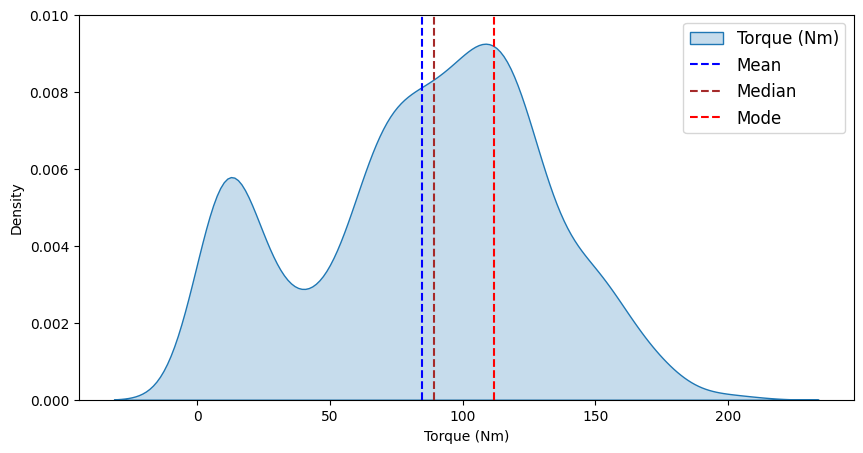

In [73]:
plt.figure(figsize=(10,5))
sns.kdeplot(torque_arr, fill=True)
plt.vlines(x=np.mean(torque_arr), ymin=0, ymax=1, color='blue', linestyle='--')
plt.vlines(x=np.median(torque_arr), ymin=0, ymax=1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(torque_arr)[0], ymin=0, ymax=1, color='red', linestyle='--')
plt.legend(['Torque (Nm)', 'Mean', 'Median', 'Mode'], fontsize=12)

# Sets the visible range of the y-axis from 0 to 0.01
# The default visible range of the y-axis is from 0 to 1
plt.ylim(0, 0.01)

plt.show()

It can be seen that the distribution is left skewed because it is heavier on the right and has a long tail on the left. Based on the visualization, median, mean, mode are not always the same. In this case, the median can be an appropriate measure to describe the central tendency of the data.

To compare the distribution of data A to data B, we can use the KDE overlapping plot.

For example, we want to compare the distribution of Torque on Yamaha and BMW.

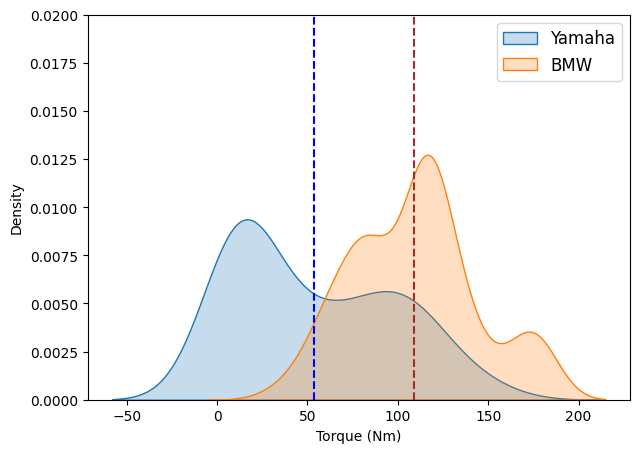

In [74]:
# KDE Plot
yamaha = df[df['Brand'] == 'yamaha']
bmw = df[df['Brand'] == 'bmw']
plt.figure(figsize=(7,5))
sns.kdeplot(yamaha['Torque (Nm)'], fill=True)
sns.kdeplot(bmw['Torque (Nm)'], fill=True)
plt.legend(['Yamaha','BMW'], fontsize=12)
plt.vlines(x=yamaha['Torque (Nm)'].mean(), ymin=0, ymax=0.9, color='blue', linestyle='--')
plt.vlines(x=bmw['Torque (Nm)'].mean(), ymin=0, ymax=0.9, color='brown', linestyle='--')
# Sets the visible range of the y-axis from 0 to 0.01
# The default visible range of the y-axis is from 0 to 1
plt.ylim(0, 0.02)

plt.show()

From the KDE plot, we can see that the distribution of BMW is more dense on the right and the distribution of Yamaha is more dense on the left. It indicates that there might be a higher proportion of BMW products with higher maximum torque values compared to Yamaha. This is further proven by the average maximum torque of BMW which is higher than Yamaha.

# Correlation

Correlation is a measure of dependency between attributes in data. Correlation is often used to measure whether an attribute has a strong linear relationship or not.

In the context of correlation, there are two common types of correlation:

* Positive Correlation: When two variables have a positive correlation, it means that when one variable increases, the other also tends to increase, and vice versa. This indicates a direct relationship between the two variables.

* Negative Correlation: If two variables have a negative correlation, it means that when one variable increases, the other tends to decrease, and vice versa. This suggests an inverse or opposing relationship between the two variables.

There are several types of correlation that can be used on different types of data. **Pearson correlation** commonly used to measure correlations on numerical attributes. Pearson Correlation can be measured using the **Pearson correlation coefficient**. This coefficient has values ranging from -1 to 1:

* A value of +1 indicates a perfect positive correlation, meaning both variables move in the same direction linearly.
* A value of -1 indicates a perfect negative correlation, meaning both variables move in opposite directions linearly.
* A value of 0 indicates no linear correlation between the two variables.

In [75]:
df.corr(method='pearson', numeric_only=True)

,Displacement (ccm),Power (hp),Torque (Nm),Bore (mm),Stroke (mm),Fuel capacity (lts),Dry weight (kg),Wheelbase (mm),Seat height (mm)
Displacement (ccm),1.000000,0.658477,0.960601,0.768074,0.690884,0.663767,0.804713,0.698788,-0.202338
Power (hp),0.658477,1.000000,0.802032,0.568609,0.034777,0.555552,0.305056,0.311340,0.286764
Torque (Nm),0.960601,0.802032,1.000000,0.755840,0.543094,0.688418,0.713771,0.630630,-0.046365
Bore (mm),0.768074,0.568609,0.755840,1.000000,0.581749,0.502844,0.520249,0.557010,0.038732
Stroke (mm),0.690884,0.034777,0.543094,0.581749,1.000000,0.304209,0.701560,0.564029,-0.426667
Fuel capacity (lts),0.663767,0.555552,0.688418,0.502844,0.304209,1.000000,0.668180,0.627795,0.065719
Dry weight (kg),0.804713,0.305056,0.713771,0.520249,0.701560,0.668180,1.000000,0.814211,-0.401719
Wheelbase (mm),0.698788,0.311340,0.630630,0.557010,0.564029,0.627795,0.814211,1.000000,-0.294244
Seat height (mm),-0.202338,0.286764,-0.046365,0.038732,-0.426667,0.065719,-0.401719,-0.294244,1.000000


From the Pearson correlation above, we can determine which attribute pairs have a strong relationship. To prove, below there are 2 scatterplots showing a linear relationship with `Dry weight (kg)`, ie
* `Wheelbase (mm)`: 0.81
* `Displacement (ccm)`: 0.80

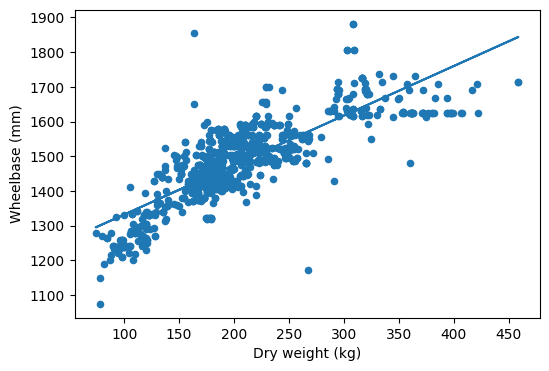

In [76]:
w = df["Dry weight (kg)"]
z = df["Wheelbase (mm)"]
df.plot.scatter(x="Dry weight (kg)", y="Wheelbase (mm)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

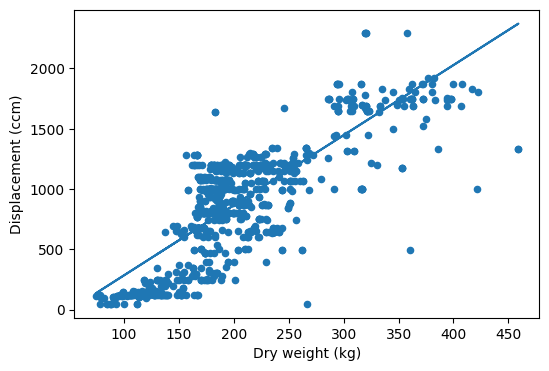

In [77]:
w = df["Dry weight (kg)"]
z = df["Displacement (ccm)"]
df.plot.scatter(x="Dry weight (kg)", y="Displacement (ccm)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

# Data Visualization

<Axes: xlabel='count', ylabel='Brand'>

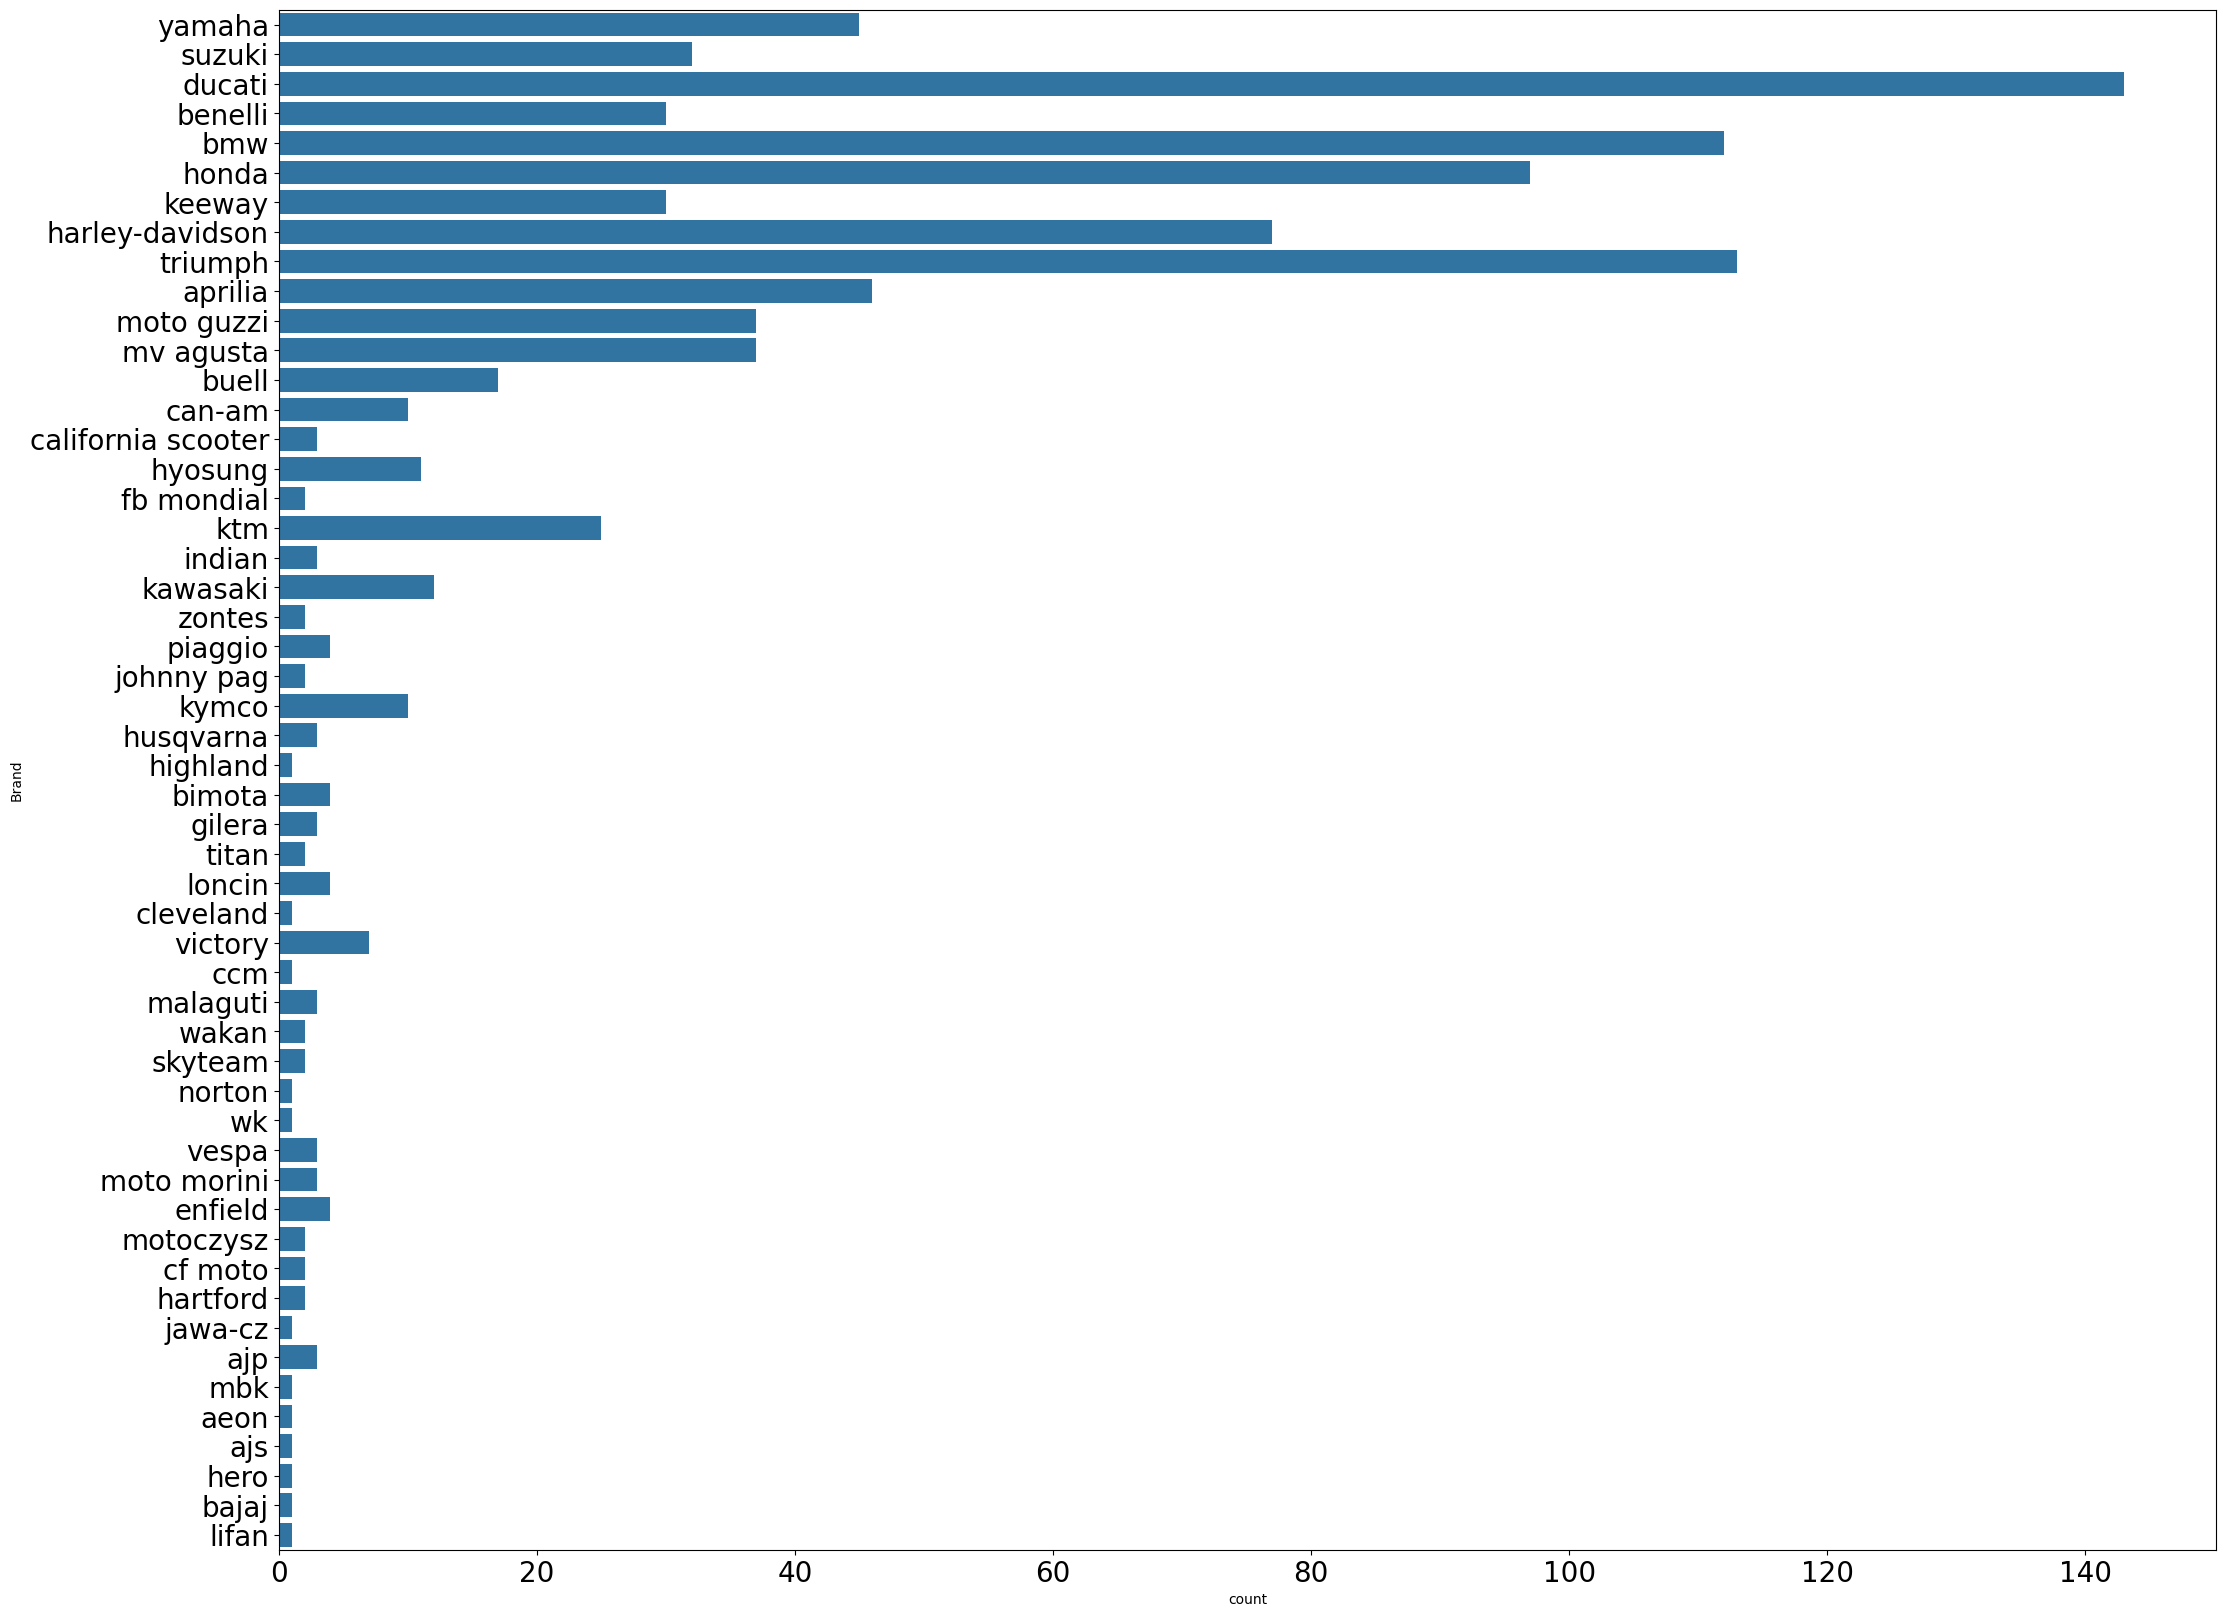

In [78]:
plt.figure(figsize=(25,20))
plt.yticks(size=20)

#to increase x ticks
plt.xticks(size=20)
# A function that creates a plot to see the frequency distribution for a single column/attribute
sns.countplot(y='Brand', data=df)

As we can see from the countplot above, Ducati is the brand with the most motorcycle products in the dataset.

Here is an example if we want to obtain a visualization of data that has been sorted from the largest to the smallest based on its values.

<Axes: xlabel='count', ylabel='Brand'>

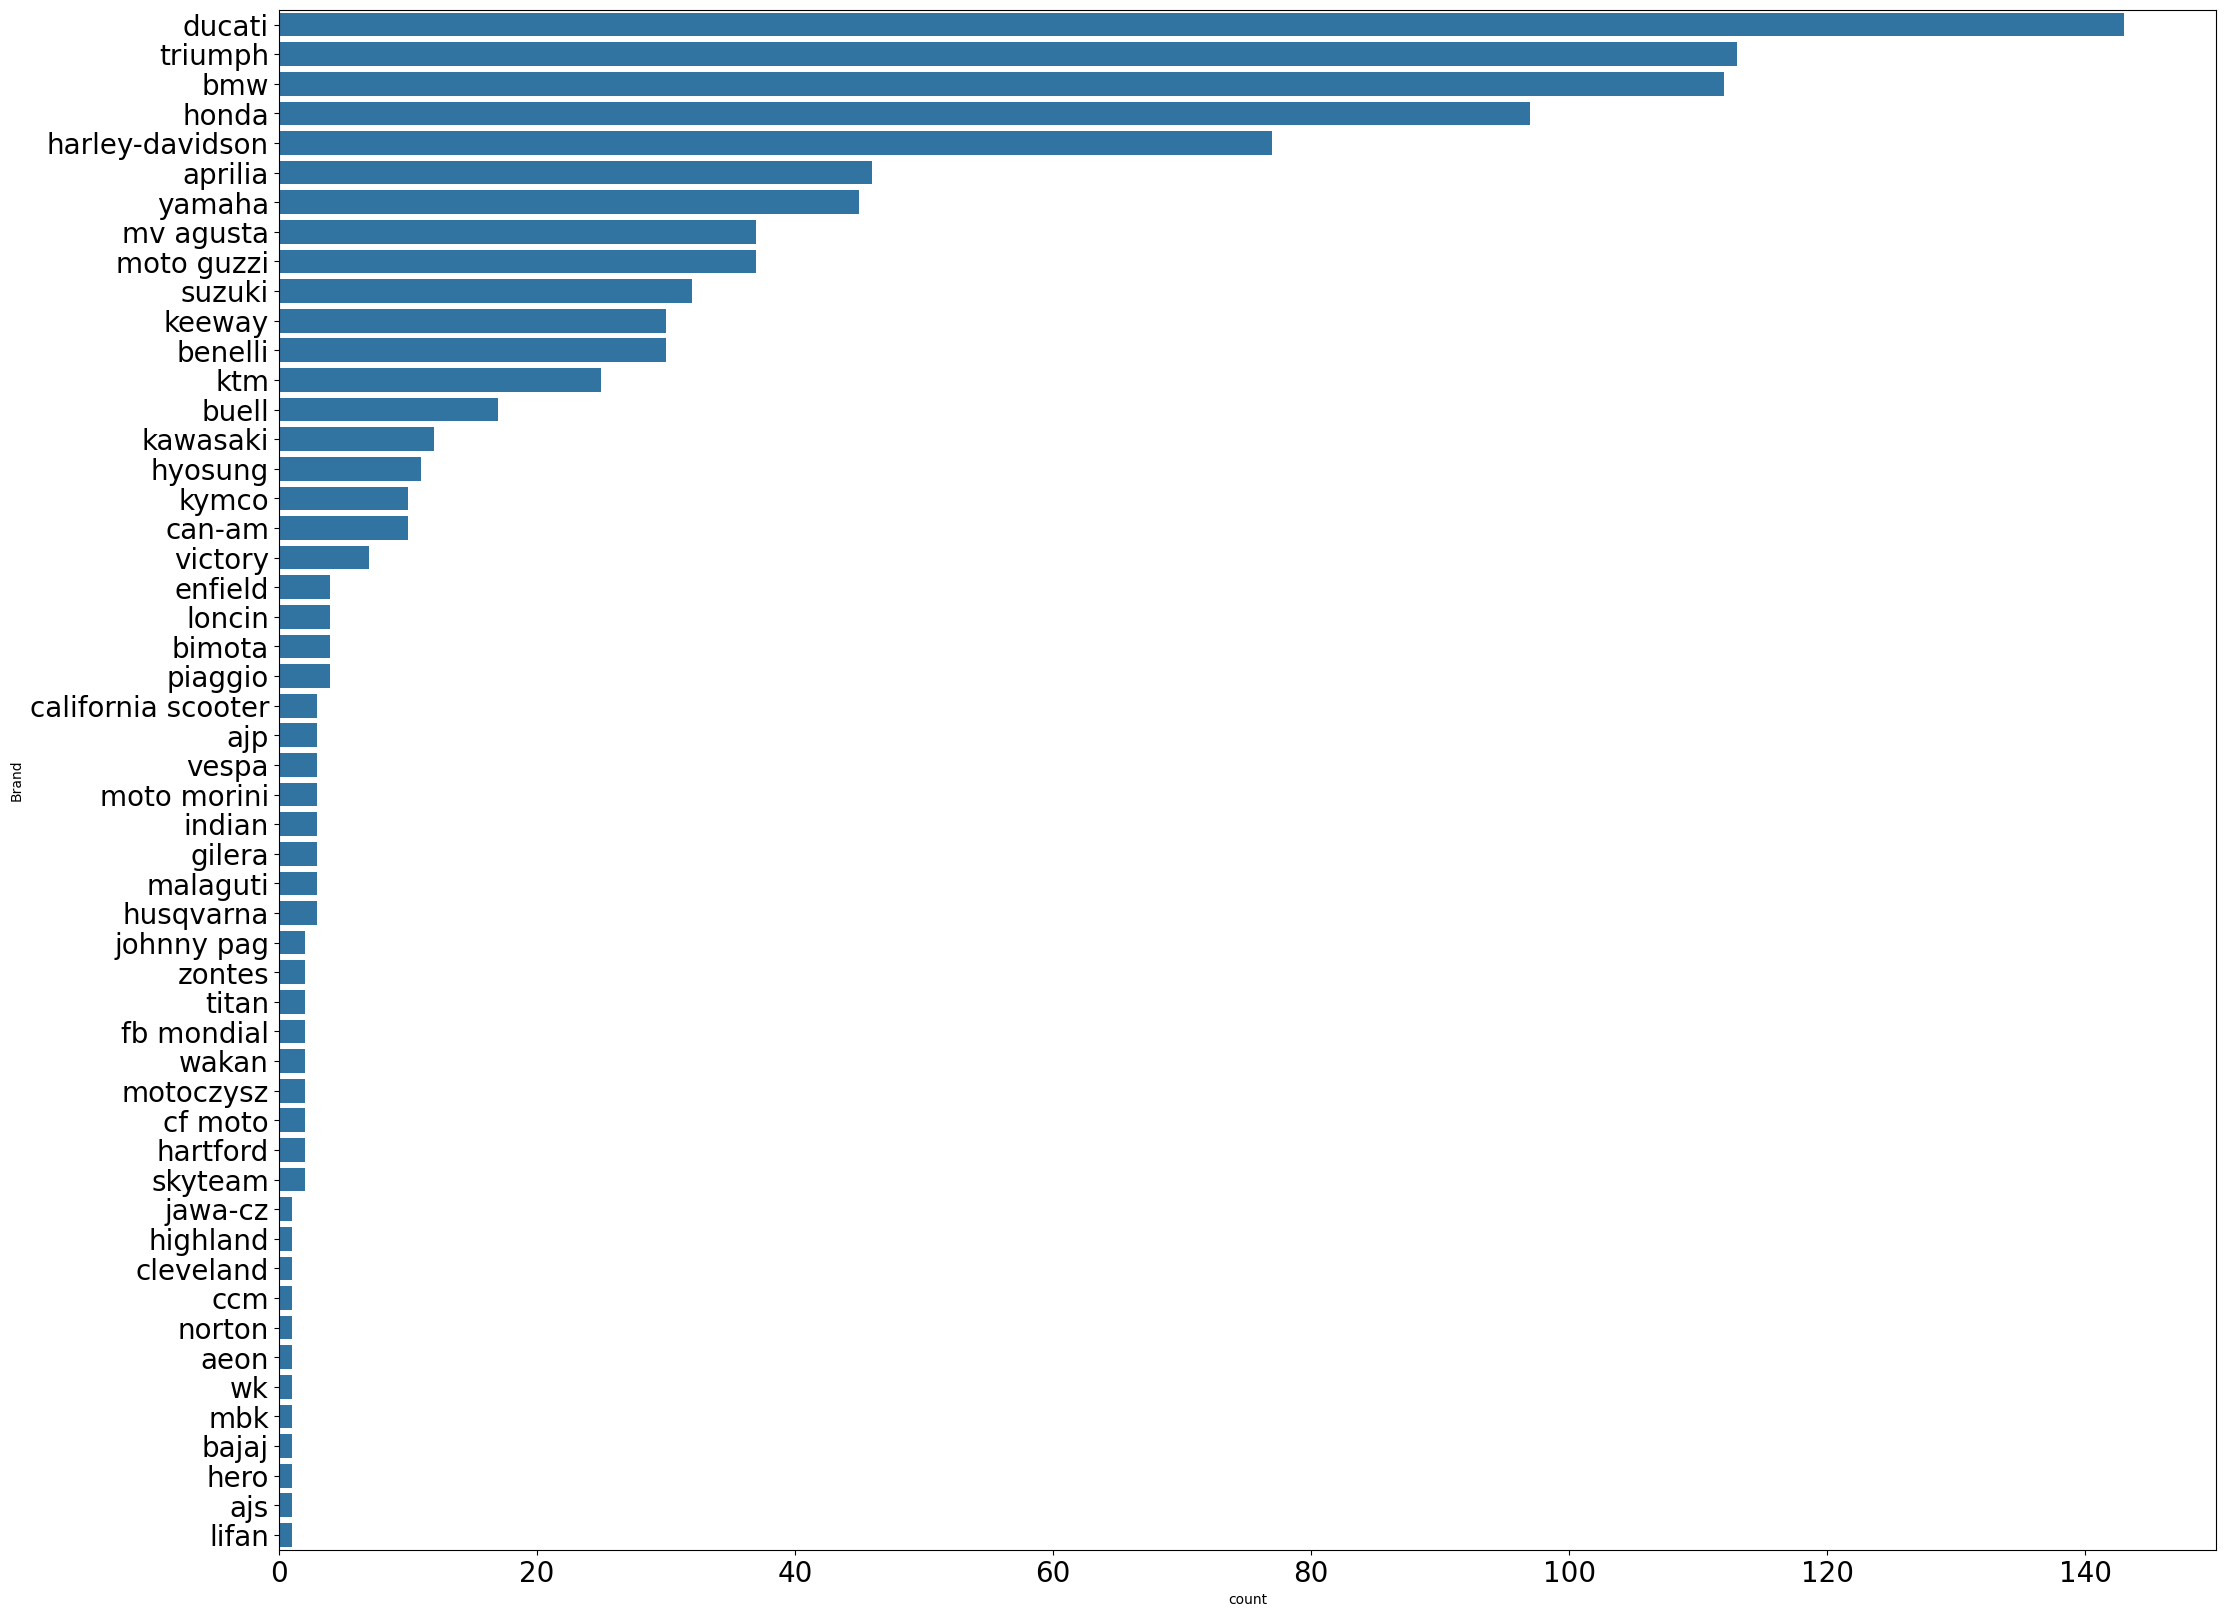

In [79]:
# Calculate the counts of each brand and sort them in descending order
brand_counts = df['Brand'].value_counts().sort_values(ascending=False)

# Create a countplot with sorted order
plt.figure(figsize=(25, 20))
plt.yticks(size=20)
plt.xticks(size=20)
sns.countplot(y='Brand', data=df, order=brand_counts.index)

<Axes: xlabel='count', ylabel='Cooling system'>

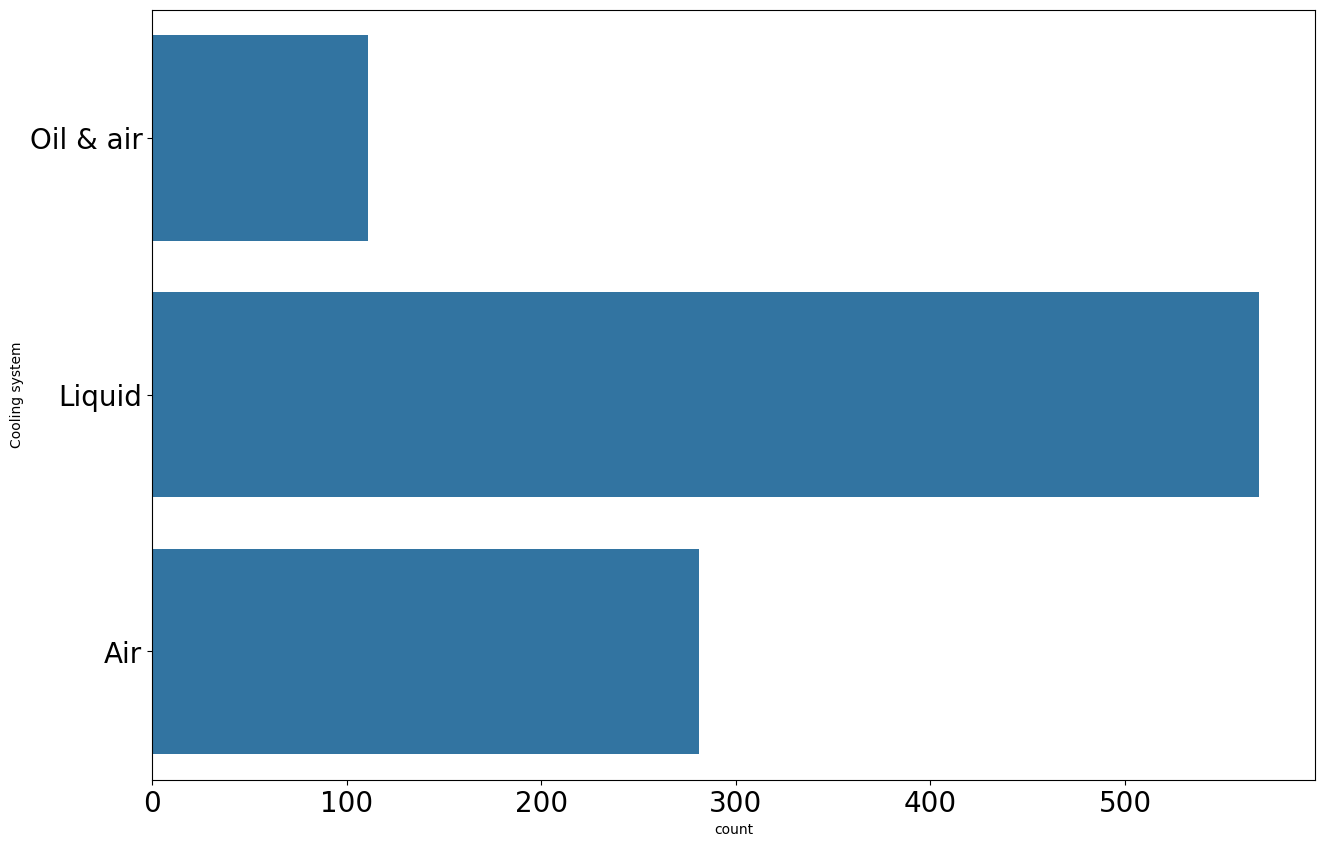

In [80]:
plt.figure(figsize=(15,10))
plt.yticks(size=20)

#to increase x ticks
plt.xticks(size=20)
sns.countplot(y='Cooling system', data=df)

From the countplot above, the most used cooling system for motorcycles is "Liquid", while the "Oil & air" system is the least used.

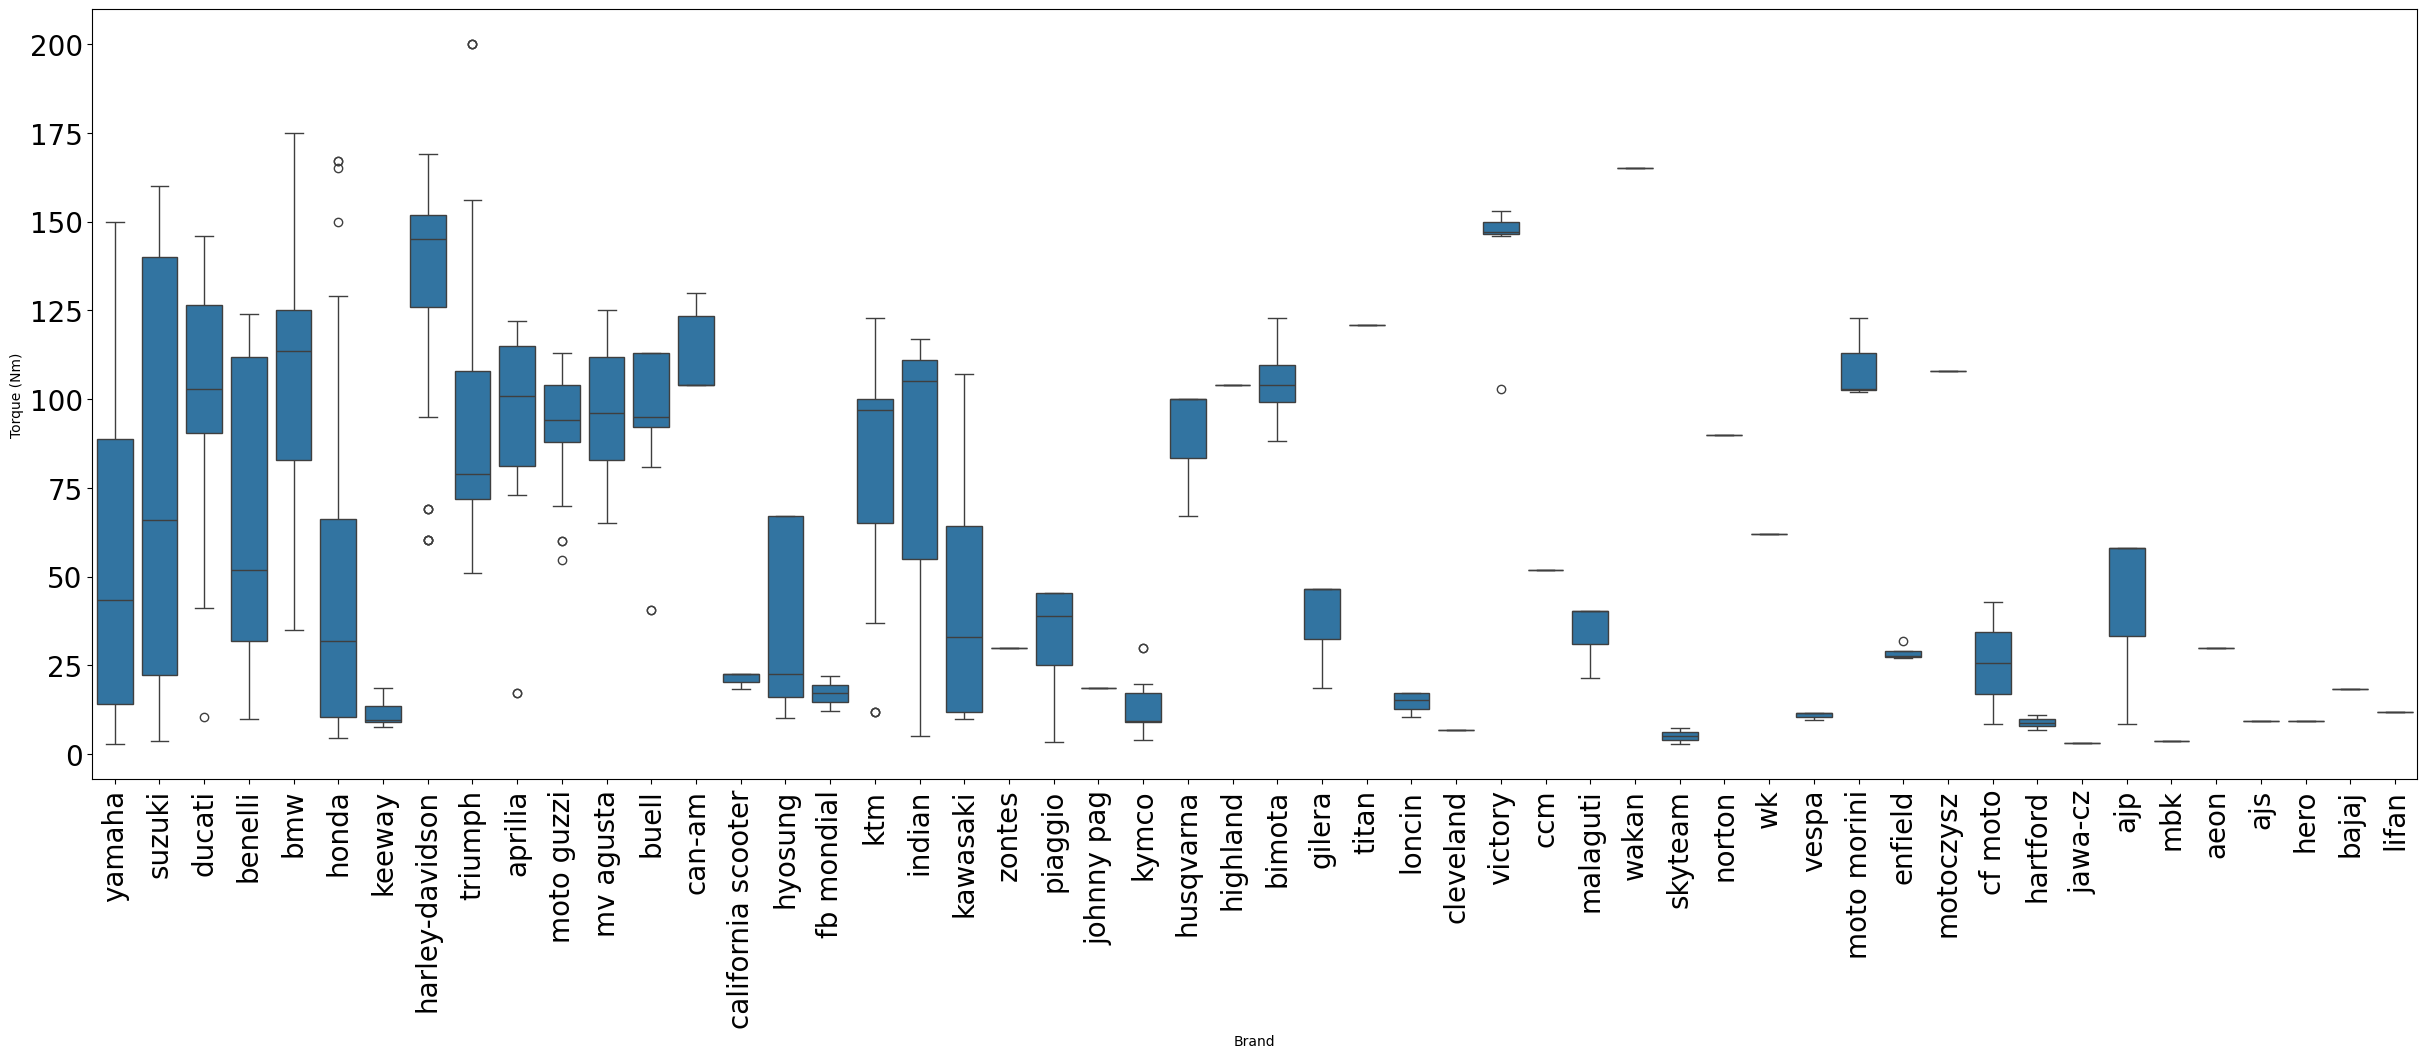

In [81]:
'''This code generates a boxplot illustrating the distribution of torque values across various
vehicle brands, with the brands represented on the x-axis and torque values on the y-axis.'''
# Create the boxplot
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='Brand', y='Torque (Nm)')
plt.show()

Here is another example with only the top 5 vehicle brands with the most motorcycle products in the dataset.

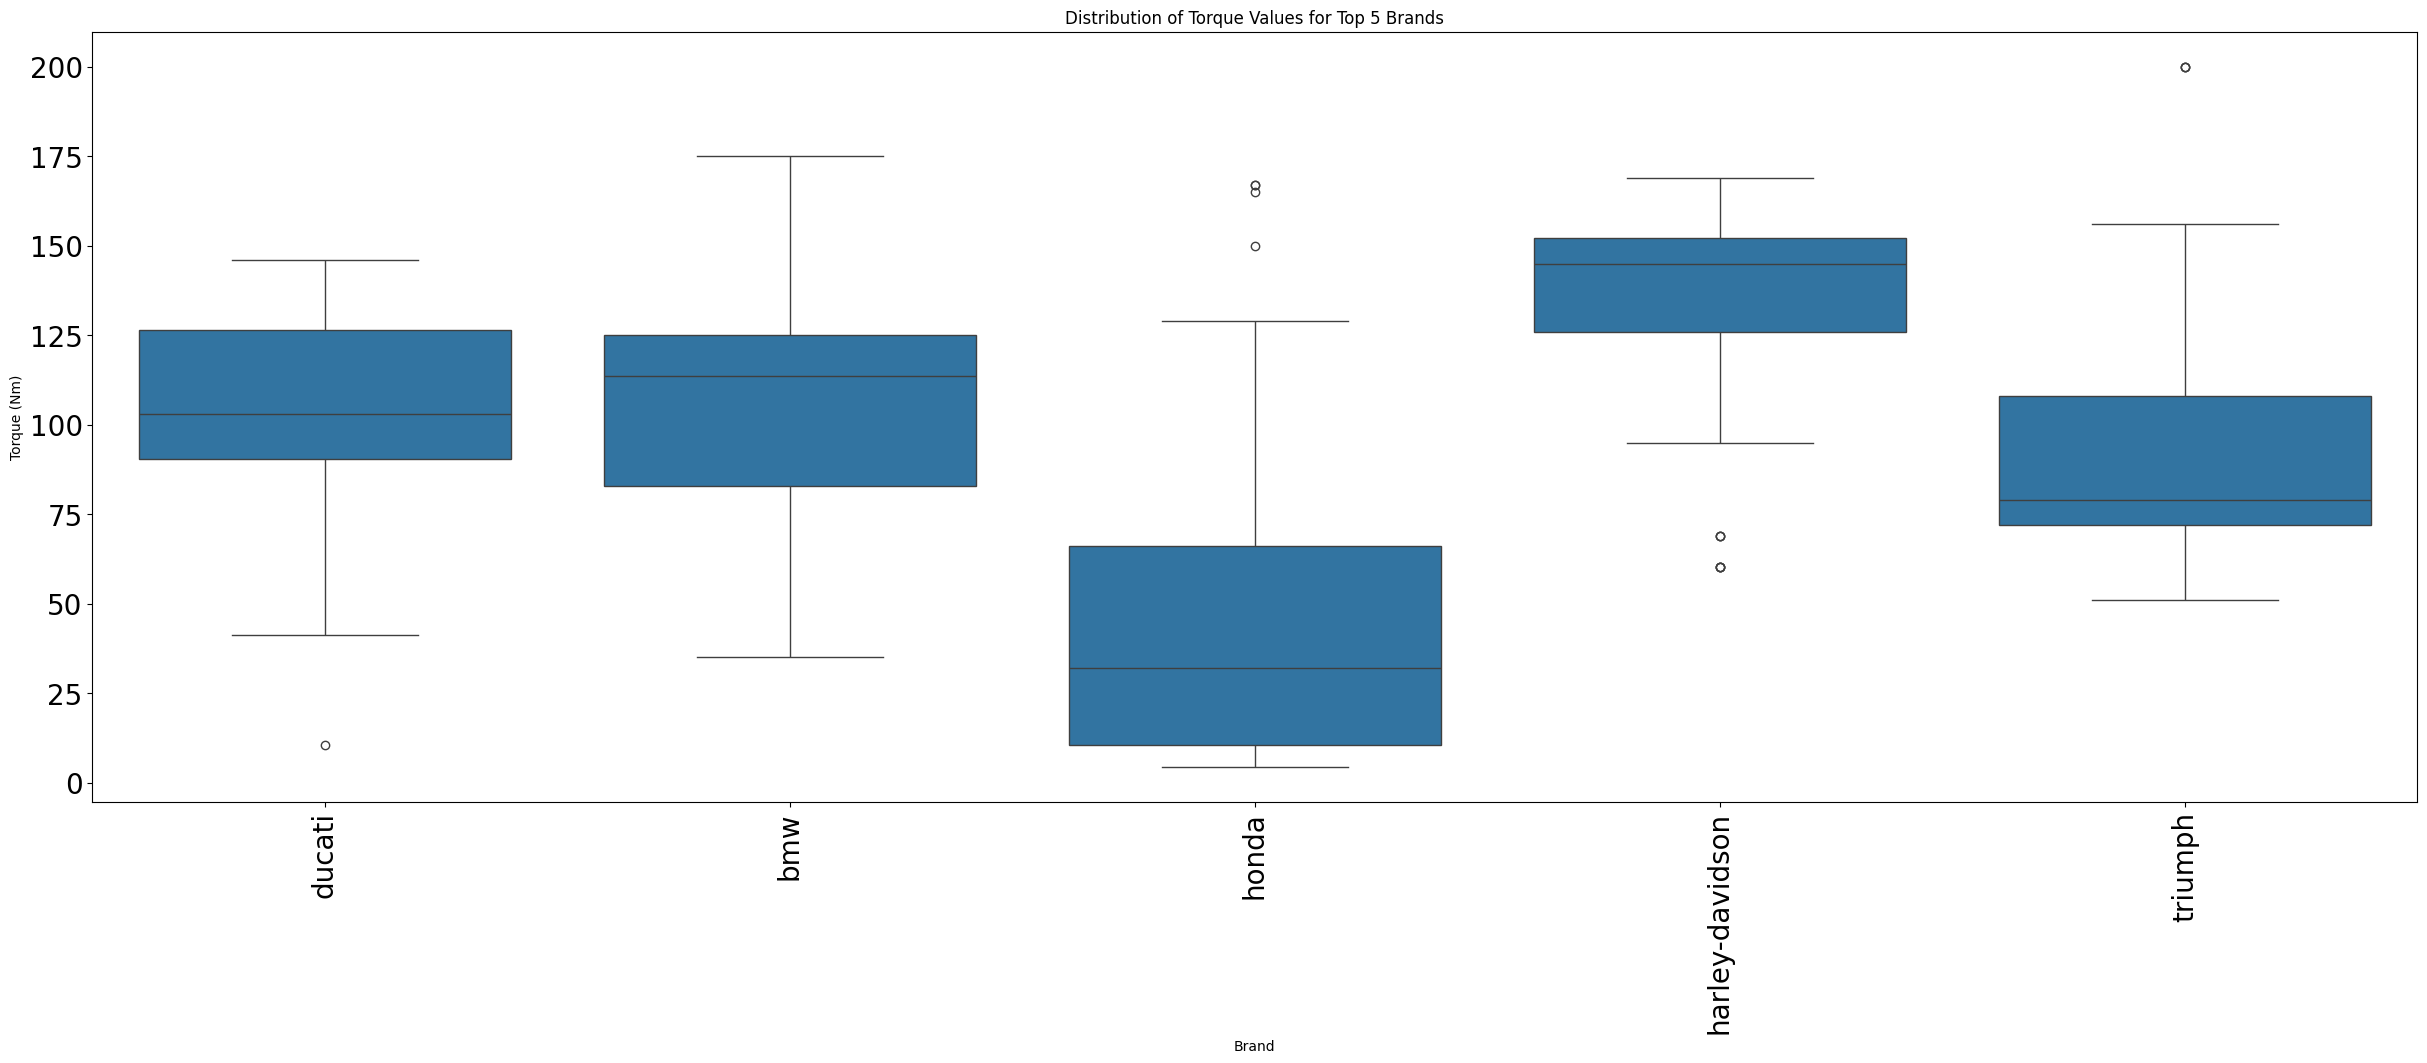

In [82]:
# Get the top 5 brands
brand_counts = df['Brand'].value_counts().sort_values(ascending=False)
top_5_brands = brand_counts.head(5)

# Filter the DataFrame to include only the top 5 brands
df_top_5 = df[df['Brand'].isin(top_5_brands.index)]

# Create the boxplot
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df_top_5, x='Brand', y='Torque (Nm)')
plt.title('Distribution of Torque Values for Top 5 Brands')
plt.show()

# Assignment

## Part 1: Descriptive Statistics (Refer to df)

##### 1) Display the descriptive statistics for attribute `Dry weight (kg)`! (must include: Mean, Median, Mode, Standard Deviation, Variance, Minimum, Maximum, Range, Q1, Q2, Q3)

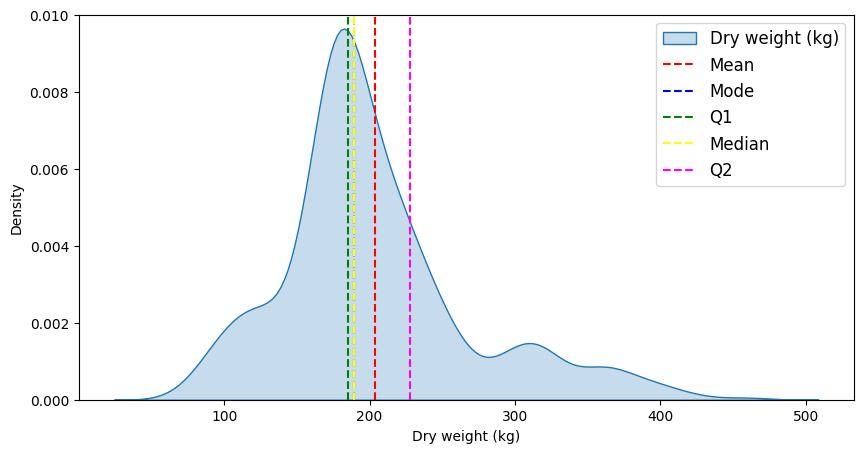

In [83]:
#Important Imports...
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

#Opens the CSV and reads it, automatically formats it as a DataFrame
df = pd.read_csv('motorcycle_specifications.csv')


#Descriptive Statistics for Dry Weight (kg)
# Mean, Median, Mode, Standard Deviation, Variance, Minimum, Maximum, Range, Q1, Q2, Q3

dryWeightDFProto = df['Dry weight (kg)']

stats = [
    ['Mean', np.mean(dryWeightDFProto)],
    ['Mode', np.median(dryWeightDFProto)],
    ['Mode', scp.mode(dryWeightDFProto)[0]],
    ['Standard Deviation', np.std(dryWeightDFProto)],
    ['Variance', np.var(dryWeightDFProto)],
    ['Minimum', np.min(dryWeightDFProto)],
    ['Maximum', np.max(dryWeightDFProto)],
    ['Range', np.ptp(dryWeightDFProto)],
    ['Q1', np.quantile(dryWeightDFProto, .25)],
    ['Q2', np.quantile(dryWeightDFProto, .50)],
    ['Q3', np.quantile(dryWeightDFProto, .75)]
]

dryWeightDF = pd.DataFrame(stats, columns=['Measure', 'Value'])
plt.figure(figsize=(10,5))
sns.kdeplot(dryWeightDFProto, fill=True)
plt.vlines(x=stats[0][1], ymin=0, ymax=1, color='red', linestyles='--')
plt.vlines(x=stats[1][1], ymin=0, ymax=1, color='blue', linestyles='--')
plt.vlines(x=stats[2][1], ymin=0, ymax=1, color='green', linestyles='--')
plt.vlines(x=stats[9][1], ymin=0, ymax=1, color='yellow', linestyles='--')
plt.vlines(x=stats[10][1], ymin=0, ymax=1, color='magenta', linestyles='--')
plt.legend(['Dry weight (kg)', 'Mean', 'Mode', 'Q1', 'Median', 'Q2'], fontsize=12)


plt.ylim(0, 0.01)

plt.show()


##### 2) What is the most suitable central tendency for attribute `Dry weight (kg)`? State your reasons!

**Answer Here:**
The dataset exhibits a right-skewed distribution, indicating a concentration of values towards the lower end of the scale. Opting for the mean would be suitable if the data were symmetric and normally distributed, but such is not the case in this instance. Mode, typically unreliable for numeric data, is not the preferred choice. Therefore, selecting the median is advisable, as it provides a robust measure for numeric data, unaffected by the skewness observed in the distribution.

##### 3) Create a heatmap of the Pearson correlation for dataset `motorcycle_specifications.csv`!

<Axes: >

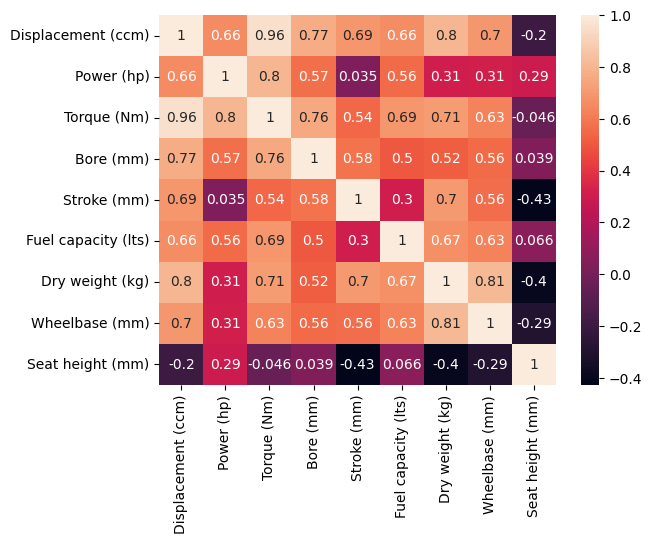

In [84]:
# Answer here
# Answer here
corr = df.corr(method='pearson', numeric_only=True)
sns.heatmap(corr, annot=True)

##### 4) Which brand averagely has the strongest horsepower (Power (hp)) motorcycles? **clue: you can try using this method `idxmax()`**

In [85]:
# Answer here

groupedUp = df.groupby("Brand")
strongestHP = groupedUp.mean(numeric_only=True).idxmax()
print('The highest HP brand is', strongestHP['Power (hp)'])


The highest HP brand is motoczysz


## Part 2: Data Visualization (Refer to df)

For each sub-problem, choose one of the following visualizations:
* Pie charts
* Bar charts
* Scatter plots
* Box plots
* Histograms
* KDE Plot

Cases sometimes have more than one "right answer", because there are many ways to visualize data. Choose the one that you think is most suitable based on the given case.

**Explicitly write down which chart you chose and why.**

##### 1) Visualize the number of total motorcycles for each category! What category has the most motorcycle?

<Axes: xlabel='Category', ylabel='count'>

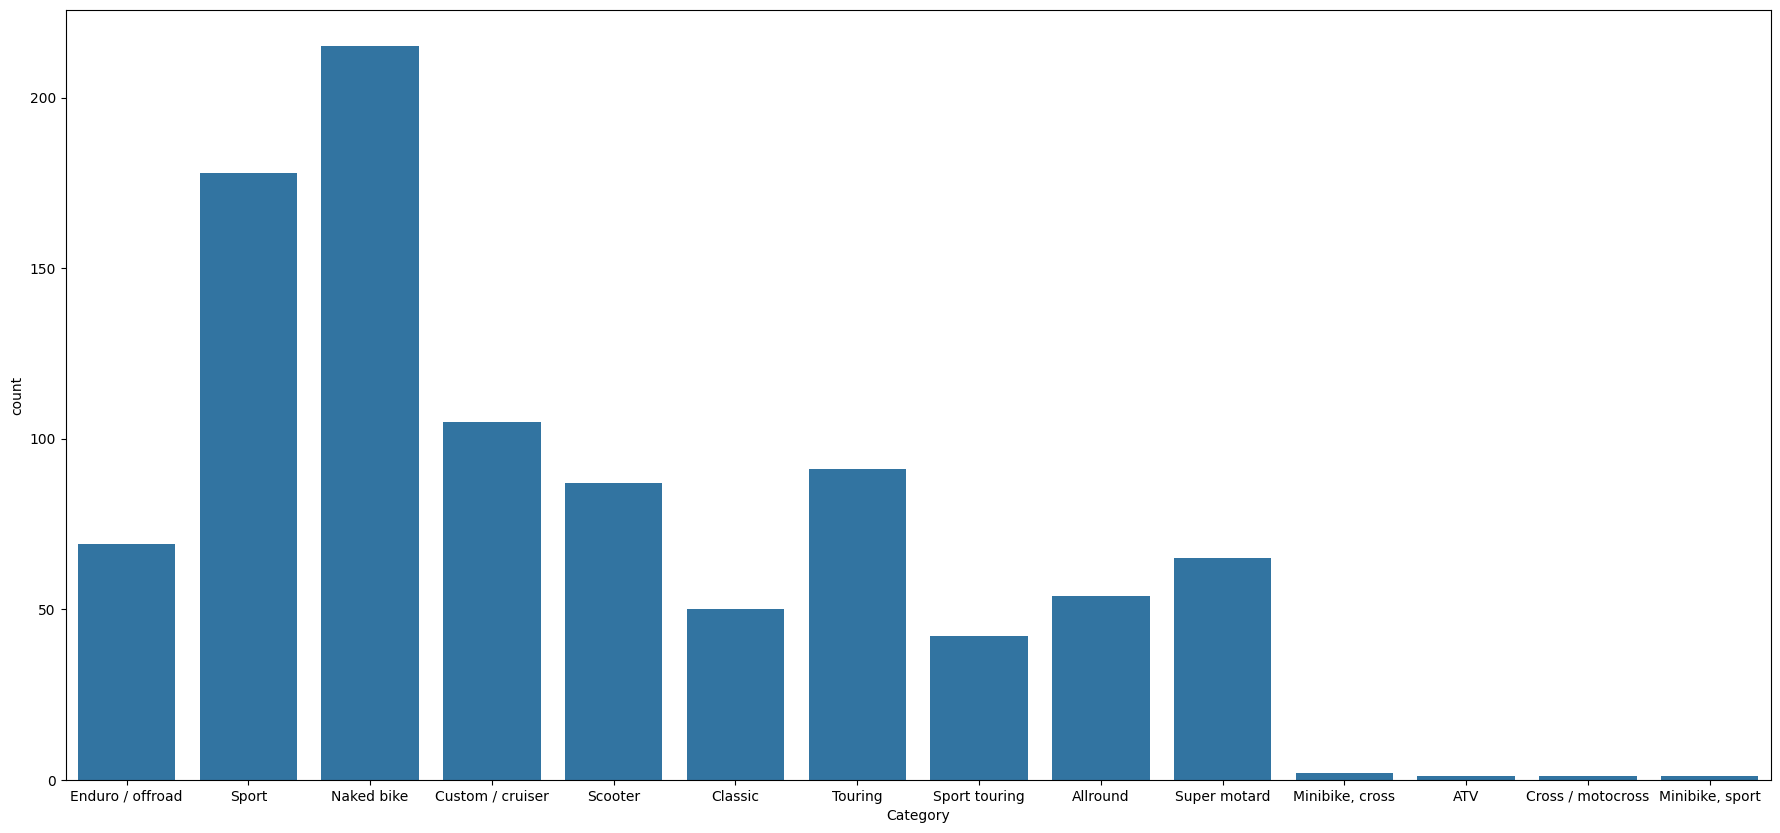

In [86]:
# Answer here
plt.figure(figsize=(22,10))
sns.countplot(x= df['Category'])

**Answer Here:**
Barcharts are one of the easiest charts to derive information for, which is finding frequency within a category. For this one, the most motorcycles is Naked Bike, which has over 200 in frequency.

##### 2) What is the composition of motorcycles based on their fuel capacity and cooling system? Create a visualization showing the percentage of motorcycles with different cooling systems, categorized by fuel capacity greater than 15 liters and equal to or less than 15 liters. Why did you choose this visualization?

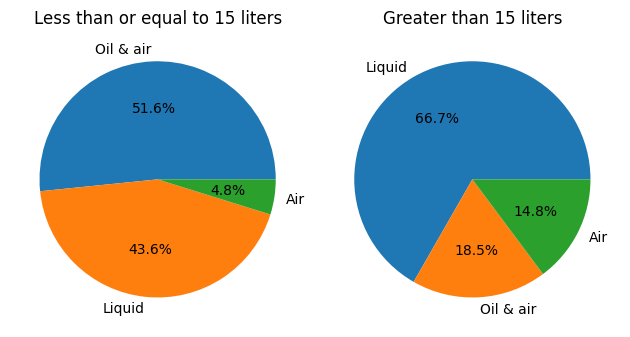

In [87]:
# Answer here
greaterThan15 = df[df['Fuel capacity (lts)']<=15]
lowerThan15 = df[df['Fuel capacity (lts)'] > 15]

fig, axis = plt.subplots(1,2)
axis[1].pie(lowerThan15["Cooling system"].value_counts(), labels=lowerThan15["Cooling system"].unique(), autopct = "%1.1f%%")
axis[0].set_title('Less than or equal to 15 liters')
axis[0].pie(greaterThan15["Cooling system"].value_counts(), labels=greaterThan15["Cooling system"].unique(), autopct = "%1.1f%%")
axis[1].set_title("Greater than 15 liters")
axis[0].set_aspect("equal")
axis[1].set_aspect("equal")

plt.tight_layout()

plt.show()

**Answer Here:**
Using a Pie Chart as a visualisation is very good in this case due to the limited options and attributes. Not only it is grouped by two, less than or equal to 15 l, and greater than 15 l, but each of said group has only three attributes that can be presented easily within a pie chart. If there were more, it'd be even harder to read.

##### 3) Create a visualization to examine whether there are outliers in the `Wheelbase (mm)` attribute for each Gearbox. Why do you choose the visualization? Provide an example of a Gearbox that appears to have outliers!

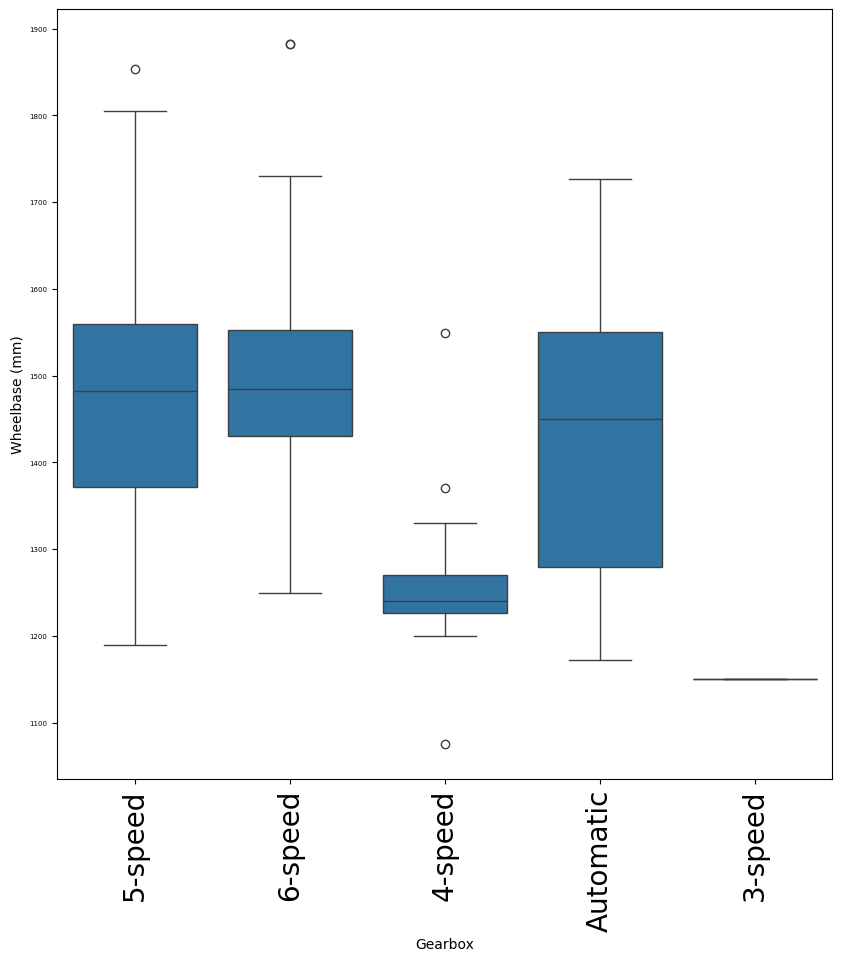

In [95]:
# Answer here

plt.figure(figsize=(10,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=5)
sns.boxplot(data=df, x='Gearbox', y='Wheelbase (mm)')
plt.show()

**Answer Here:**
Outliers are best detected with a Boxplot. Not only that but it also shows where the data lies within the interquartile range, as well as showing where the Median is. The data that lies outside of the interquartile range, i.e. the outliers, are represented by the dots above or below the boxes. e.g. one outlier below the interquartle range, and two above the inq. range for the 4-speed; one outlier above the inq. range for 6-speed, etc.

##### 4) Create a visualization to observe the pattern or relationship between Torque (Nm) and Power (hp). **In your opinion, what relationship exists between Torque and Power? Explain!**

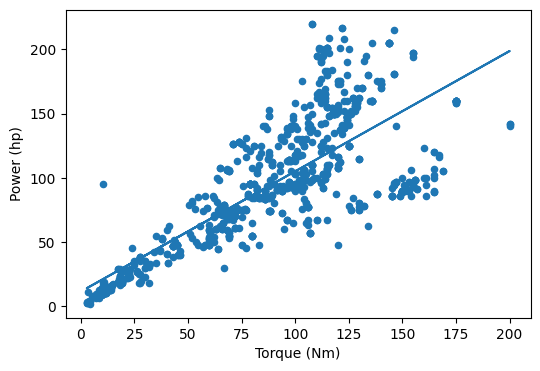

In [96]:
# Answer here
torque = df["Torque (Nm)"]
powerinHP = df["Power (hp)"]
df.plot.scatter(x="Torque (Nm)", y="Power (hp)", figsize=(6,4))
c, m = polyfit(torque, powerinHP, 1)
plt.plot(torque, c + m * torque, '-')
plt.show()

**Answer Here:**
Seeing correlation requires a scatterplot. It plots the individual data on the screen, and creates a line of best fit to show how close each of the individual data are. According to the scatterplot itself, as power increases, torque also increases proportionally, although not exactly to a proportion that's accurate like a ratio would be.

##### 5) Visualize the distribution of the `Dry weight (kg)` data for 'Classic' and 'Sport' motorcycle categories. Provide your analysis!

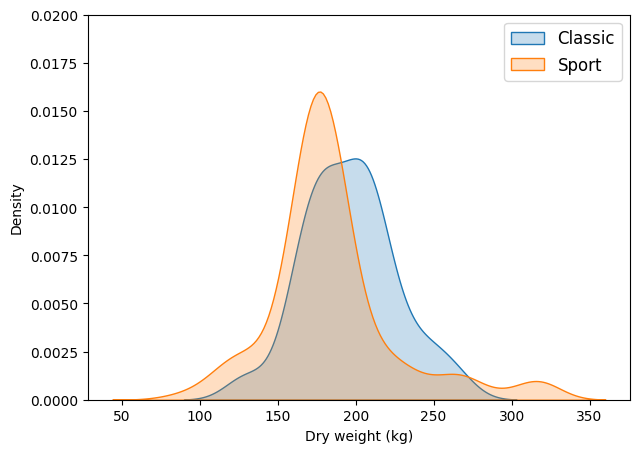

In [98]:
# Answer here

classic = df[df['Category'] == 'Classic']
sport = df[df['Category'] == 'Sport']
plt.figure(figsize=(7,5))

sns.kdeplot(classic['Dry weight (kg)'], fill=True)


sns.kdeplot(sport['Dry weight (kg)'], fill=True)

plt.legend(['Classic', 'Sport'], fontsize=12)
plt.ylim(0, 0.02)

plt.show()

**Answer Here:**
Visualising the distribution of dry weight data for classic and sport would be best using a Kernel Density Estimation plot. Since you can see multiple plotting points at once, overlapped with one another. As per the KDE, Classic tends to be heavier with most of the motorcycles weighing 200 kg. Even though it is technically lighter than Classic with it weighing around 150 to 200, there's more motorcycles that is within that category than classic motorcycles weighing 200 kg. 